# Notebook 01: Universe and Data Acquisition


In [35]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data import load_prices_yf, compute_log_prices_and_returns

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3


#### 1. Data Download
# 
##### We focus on **SPY (SPDR S&P 500 ETF)** and **IVV (iShares Core S&P 500 ETF)** as they:
##### - Track the exact same index (S&P 500)
##### - Hold nearly identical portfolios (same 500 stocks)
##### - Should be perfectly cointegrated by arbitrage (law of one price)
##### - Are highly liquid (easy to trade in practice)
# 
##### This is a "textbook" pairs trading setup - if two assets track the same index,
##### any price divergence should be temporary and tradeable.
# 
##### Data source: Yahoo Finance (yfinance)
##### Frequency: Daily adjusted close prices
##### Period: 2014-01-01 to present (~10 years)




In [40]:
# Download data
tickers = ["SPY", "IVV"]
start_date = "2014-01-01"

print(f"Downloading {tickers} from {start_date}...")
px = load_prices_yf(tickers, start=start_date)
print(f"Downloaded {len(px)} days of data")
print(f"Date range: {px.index[0]} to {px.index[-1]}")

px.head()

Downloaded 3029 days of data
Date range: 2014-01-02 00:00:00 to 2026-01-16 00:00:00


Ticker,IVV,SPY
Date,,
2014-01-02,149.429108,148.986099
2014-01-03,149.364105,148.961609
2014-01-06,148.958069,148.529892
2014-01-07,149.875717,149.442169
2014-01-08,149.956970,149.474762


In [44]:
# Compute log prices and returns
df = compute_log_prices_and_returns(px)
print(f"Final dataset: {len(df)} rows")
df.head()

Final dataset: 3028 rows


Ticker,IVV,SPY,log_IVV,ret_IVV,log_SPY,ret_SPY
Date,,,,,,
2014-01-03,149.364105,148.961609,5.006387,-0.000435,5.003689,-0.000164
2014-01-06,148.958069,148.529892,5.003665,-0.002722,5.000786,-0.002902
2014-01-07,149.875717,149.442169,5.009806,0.006142,5.006909,0.006123
2014-01-08,149.956970,149.474762,5.010348,0.000542,5.007128,0.000218
2014-01-09,150.030029,149.572495,5.010835,0.000487,5.007781,0.000654


In [46]:
# Save processed data
df.to_csv("../data/processed/spy_ivv_daily.csv")
print("Saved to data/processed/spy_ivv_daily.csv")

Saved to data/processed/spy_ivv_daily.csv


##### 2. Exploratory Data Analysis

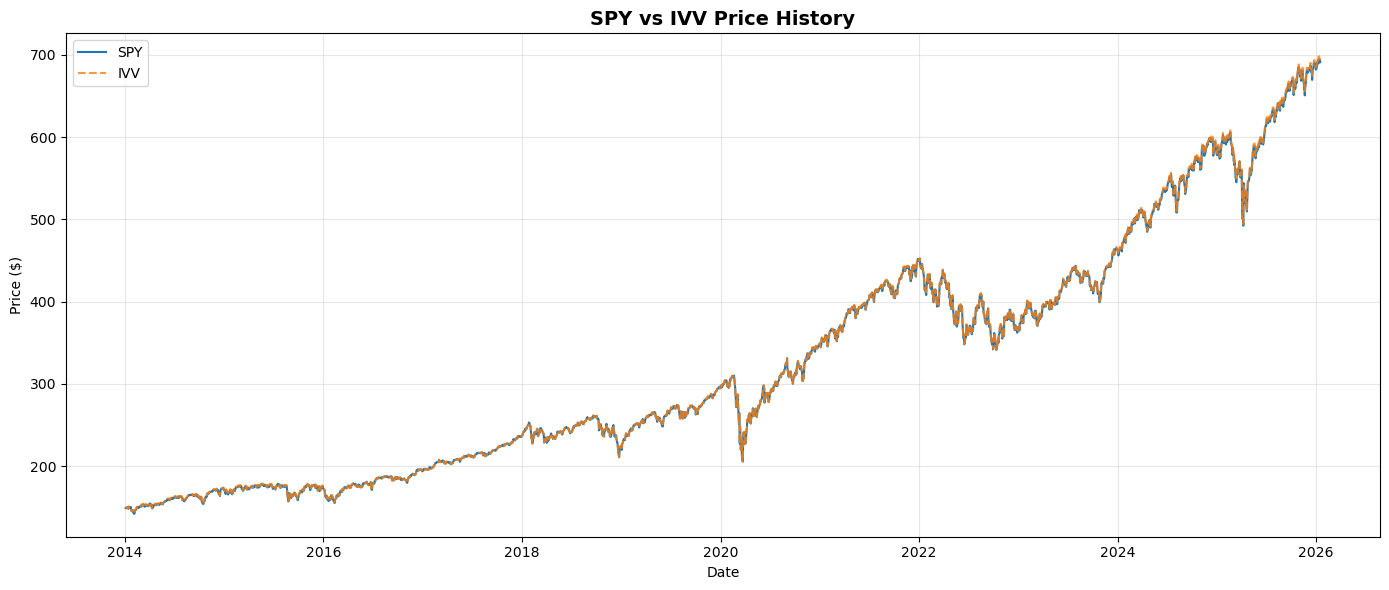

Note: Prices should be almost identical (tracking same index)


In [48]:
# Price series plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df["SPY"], label="SPY", linewidth=1.5)
ax.plot(df.index, df["IVV"], label="IVV", linewidth=1.5, alpha=0.8, linestyle='--')
ax.set_title("SPY vs IVV Price History", fontsize=14, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../reports/figures/01_price_series.png", dpi=150)
plt.show()

print("Note: Prices should be almost identical (tracking same index)")

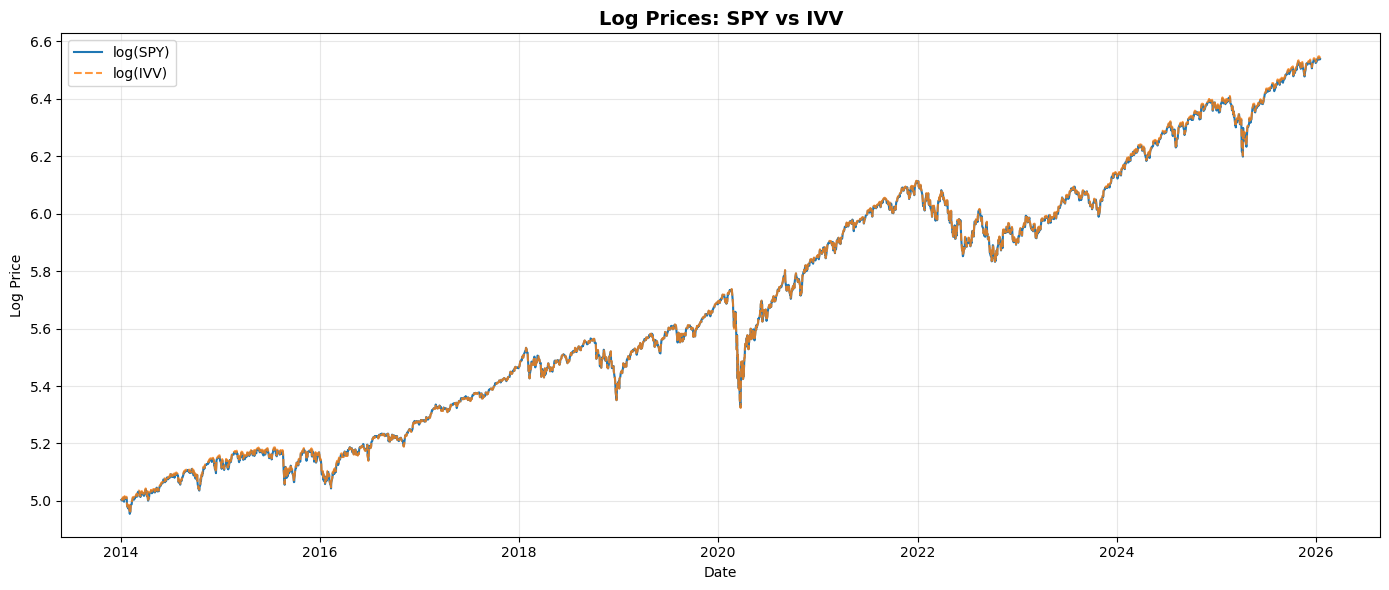

In [50]:
# Log price series (for cointegration analysis)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df["log_SPY"], label="log(SPY)", linewidth=1.5)
ax.plot(df.index, df["log_IVV"], label="log(IVV)", linewidth=1.5, alpha=0.8, linestyle='--')
ax.set_title("Log Prices: SPY vs IVV", fontsize=14, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Log Price")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../reports/figures/01_log_prices.png", dpi=150)
plt.show()

In [52]:
# Summary statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print("\nPrice Statistics:")
print(df[["SPY", "IVV"]].describe())

print("\nReturn Statistics:")
print(df[["ret_SPY", "ret_IVV"]].describe())

print("\nReturn Correlation:")
corr = df[["ret_SPY", "ret_IVV"]].corr()
print(corr)
print(f"\nExpected: Very high correlation (>0.99) since they track the same index")

SUMMARY STATISTICS

Price Statistics:
Ticker          SPY          IVV
count   3028.000000  3028.000000
mean     324.350542   325.016463
std      145.013740   145.673516
min      141.859299   142.250381
25%      195.975063   195.770374
50%      273.516190   273.732895
75%      417.262222   417.985435
max      695.159973   698.229980

Return Statistics:
Ticker      ret_SPY      ret_IVV
count   3028.000000  3028.000000
mean       0.000507     0.000507
std        0.010927     0.011000
min       -0.115887    -0.123007
25%       -0.003643    -0.003585
50%        0.000668     0.000715
75%        0.005747     0.005750
max        0.099863     0.090872

Return Correlation:
Ticker    ret_SPY   ret_IVV
Ticker                     
ret_SPY  1.000000  0.998949
ret_IVV  0.998949  1.000000

Expected: Very high correlation (>0.99) since they track the same index


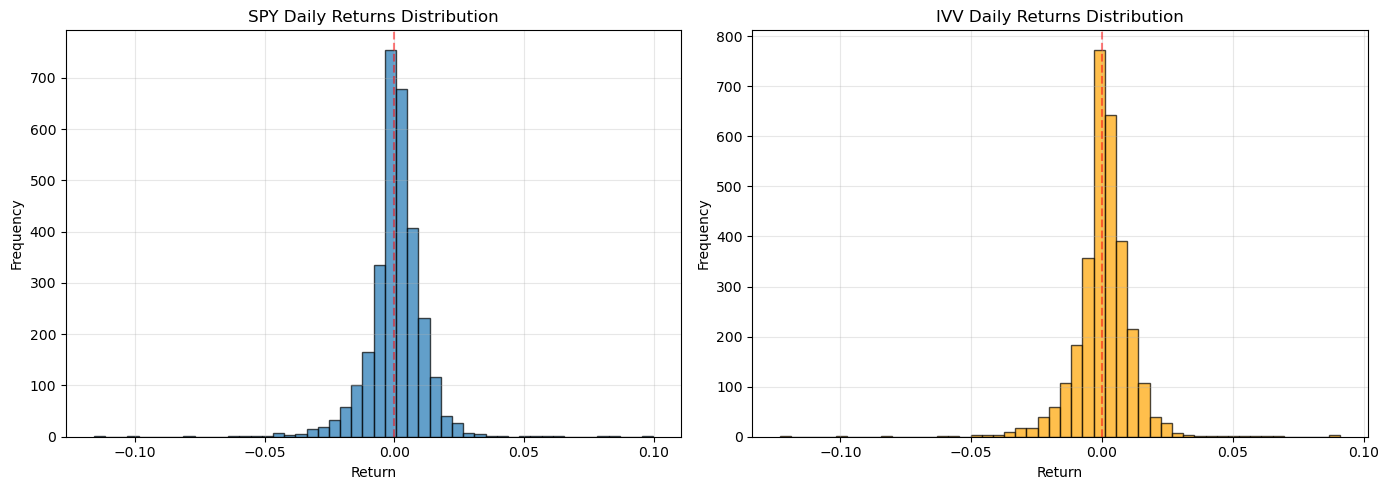

In [54]:
# Return distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df["ret_SPY"].dropna(), bins=50, alpha=0.7, label="SPY", edgecolor='black')
axes[0].set_title("SPY Daily Returns Distribution")
axes[0].set_xlabel("Return")
axes[0].set_ylabel("Frequency")
axes[0].axvline(0, color='red', linestyle='--', alpha=0.5)

axes[1].hist(df["ret_IVV"].dropna(), bins=50, alpha=0.7, label="IVV", color='orange', edgecolor='black')
axes[1].set_title("IVV Daily Returns Distribution")
axes[1].set_xlabel("Return")
axes[1].set_ylabel("Frequency")
axes[1].axvline(0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("../reports/figures/01_return_distributions.png", dpi=150)
plt.show()


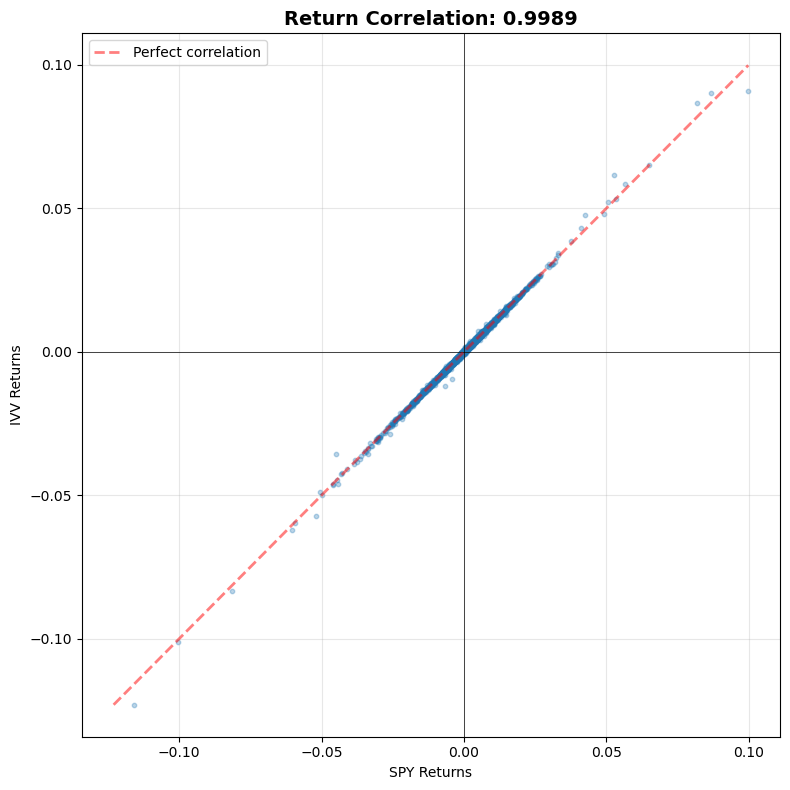

In [56]:
# Scatter plot: SPY vs IVV returns
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df["ret_SPY"], df["ret_IVV"], alpha=0.3, s=10)
ax.set_xlabel("SPY Returns")
ax.set_ylabel("IVV Returns")
ax.set_title(f"Return Correlation: {corr.iloc[0,1]:.4f}", fontsize=14, fontweight='bold')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
# Add 45-degree line (perfect correlation)
lims = [df[["ret_SPY", "ret_IVV"]].min().min(), df[["ret_SPY", "ret_IVV"]].max().max()]
ax.plot(lims, lims, 'r--', alpha=0.5, linewidth=2, label='Perfect correlation')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../reports/figures/01_return_scatter.png", dpi=150)
plt.show()

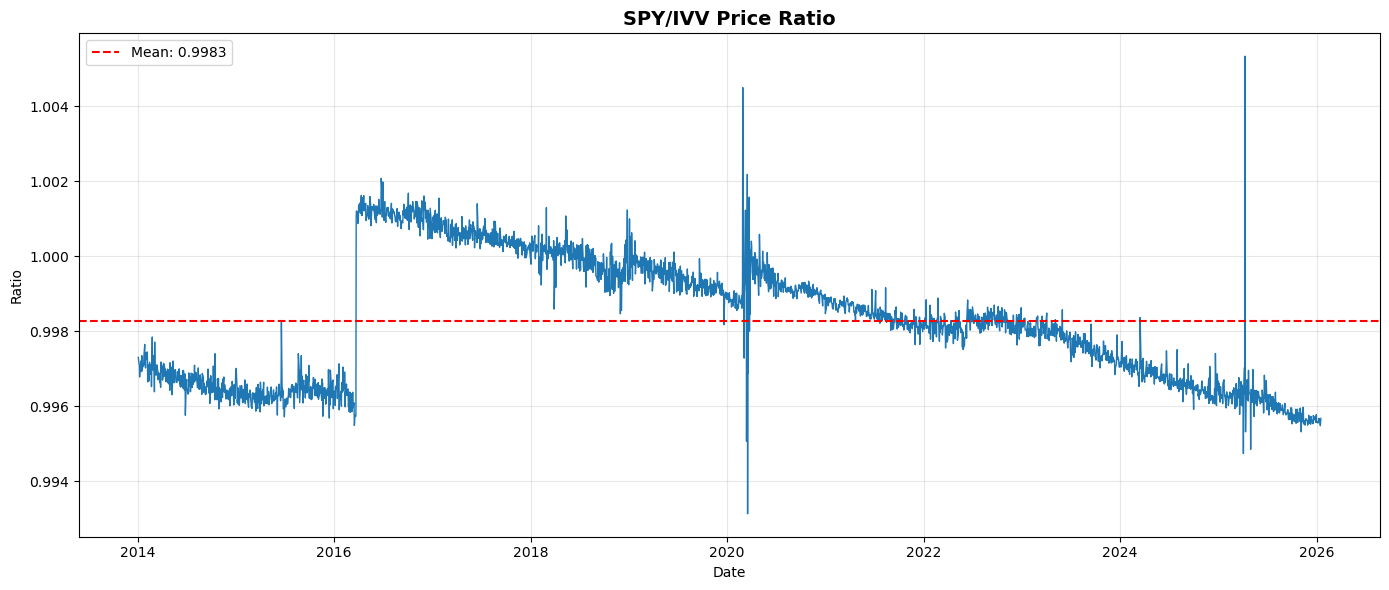


Price ratio statistics:
  Mean: 0.9983
  Std: 0.001662
  Min: 0.9931
  Max: 1.0053

Note: Very low std deviation confirms stable relationship


In [58]:
# Price ratio (should be very stable)
df["price_ratio"] = df["SPY"] / df["IVV"]

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, df["price_ratio"], linewidth=1)
ax.axhline(df["price_ratio"].mean(), color='red', linestyle='--', 
           label=f"Mean: {df['price_ratio'].mean():.4f}")
ax.set_title("SPY/IVV Price Ratio", fontsize=14, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Ratio")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../reports/figures/01_price_ratio.png", dpi=150)
plt.show()

print(f"\nPrice ratio statistics:")
print(f"  Mean: {df['price_ratio'].mean():.4f}")
print(f"  Std: {df['price_ratio'].std():.6f}")
print(f"  Min: {df['price_ratio'].min():.4f}")
print(f"  Max: {df['price_ratio'].max():.4f}")
print(f"\nNote: Very low std deviation confirms stable relationship")

#### 3. Key Takeaways
# 
##### - **Data quality:** Clean, no missing values after alignment
##### - **Return correlation:** Near-perfect (>0.99) as expected for same-index ETFs
##### - **Price ratio:** Very stable with minimal drift
##### - **Visual inspection:** Prices move in lockstep (excellent for cointegration)
# 
##### **Next step:** Formal cointegration test in notebook 03 (should easily pass)